In [201]:
import sys
sys.path.append("../")
import urllib.request
from glob import glob

import matplotlib
from matplotlib import gridspec
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
from scipy.interpolate import interp1d, RectBivariateSpline
from scipy.stats import binned_statistic
import pandas as pd
from tqdm import *
from astropy.cosmology import z_at_value
import astropy.units as u
from feynman import Diagram

from grf.units import *
from grf.grf import TransitionProbabilities, PerturbedProbability, FIRAS
from grf.simulations import GaussianRandomFieldBoxes
from grf.pk_interp import PowerSpectrumGridInterpolator

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Gaussian random field simulations for $\gamma \rightarrow A'$ transitions

In [202]:
# Plot parameters

from plot_params import params
pylab.rcParams.update(params)

cols_default = plt.rcParams['axes.prop_cycle'].by_key()['color']

/Users/smsharma/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/Users/smsharma/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


In [203]:
# Where to save plots
plots_dir = "../paper/draft-letter/plots/"

## Simulations plot (Fig. 1)

In [204]:
# Load a power spectrum
pspec = PowerSpectrumGridInterpolator("nonlin_matter_bj")

In [206]:
# Create simulations

## Simulation properties

n_mc = 1
z_fid = 100.
z_range = [90.,110.]
k_max = 300.
n_points = 300

z_crossings_collect = []
P_collect = []

## Run simulations

for i_mc in tqdm_notebook(range(n_mc)):
    GRFB = GaussianRandomFieldBoxes(z_fid=z_fid, z_range=z_range, k_max=k_max, n_points=n_points, r_filter=1.5, use_nbodykit=1, generate_1d=0, log_pk_interp=pspec)
    z_crossings_collect_temp = []
    P_collect_temp = []
    z_crossings_collect.append(GRFB.z_crossings_collect_temp)
    P_collect.append(GRFB.P_collect_temp)
    if GRFB.P_homo is not None:
        P_homo = GRFB.P_homo
    
P_collect = np.array(P_collect)
z_crossings_collect = np.array(z_crossings_collect)

/Users/smsharma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  app.launch_new_instance()


0.031372698943109484
0.03132563536242568
0.03129628910567856
0.03128479545867771
0.031291347760200934
0.03131619979588821
0.03135966872956954
0.03121265770122591
0.031289751259492384
0.03138649189421964
0.03128161099077171
0.03141371140519833
0.0313366520920774
0.031272255099864
0.031220514724049606
0.031181453235621198
0.0313985207536831




In [198]:
# Interpolate simulations from different boxes onto common grid

grid_new_list = []
old_space_list = []

for i in tqdm_notebook(range(len(GRFB.d_comoving_bins) - 1)):
    old_space = np.linspace(GRFB.d_comoving_bins[i], GRFB.d_comoving_bins[i + 1], np.shape(GRFB.fields[i][0])[0])
    old_space[0] += 1e-3 * np.random.rand(1)
    old_space = np.array([z_at_value(GRFB.cosmo.comoving_distance, old * u.Mpc) for old in old_space])
    old_space_list.append(old_space)
    new_space = np.linspace(GRFB.d_comoving_bins[i], GRFB.d_comoving_bins[i + 1], np.shape(GRFB.fields[-1][0])[0])
    new_space = np.array([z_at_value(GRFB.cosmo.comoving_distance, new * u.Mpc) for new in new_space])


    grid_new = RectBivariateSpline(old_space, old_space, GRFB.fields[i][0,:,:])(new_space, old_space)

    grid_new_list.append(grid_new)
    
old_space_all = (np.hstack(old_space_list))

/Users/smsharma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [199]:
# Calculate analytic dP/dz curve

firas = FIRAS(pspec)
z_ary, dP_dz_ary, _, _  = firas.P_tot_perturb([firas.omega_FIRAS[0]], 1., GRFB.m_A_fid, pdf="gaussian", r_smooth=0.0314, k_max=100, n_z_bins=10000)
dP_dz_ary = dP_dz_ary[0]

../grf/grf.py:532: FutureWarning: read_table is deprecated, use read_csv instead.
  


/Users/smsharma/anaconda3/lib/python3.7/site-packages/feynman/diagrams/diagrams.py:106: UserWarning: Diagram.verticle is deprecated. Use Diagram.vertex instead.
  warnings.warn('Diagram.verticle is deprecated. ' +
/Users/smsharma/anaconda3/lib/python3.7/site-packages/feynman/diagrams/diagrams.py:106: UserWarning: Diagram.verticle is deprecated. Use Diagram.vertex instead.
  warnings.warn('Diagram.verticle is deprecated. ' +
/Users/smsharma/anaconda3/lib/python3.7/site-packages/feynman/diagrams/diagrams.py:106: UserWarning: Diagram.verticle is deprecated. Use Diagram.vertex instead.
  warnings.warn('Diagram.verticle is deprecated. ' +
/Users/smsharma/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


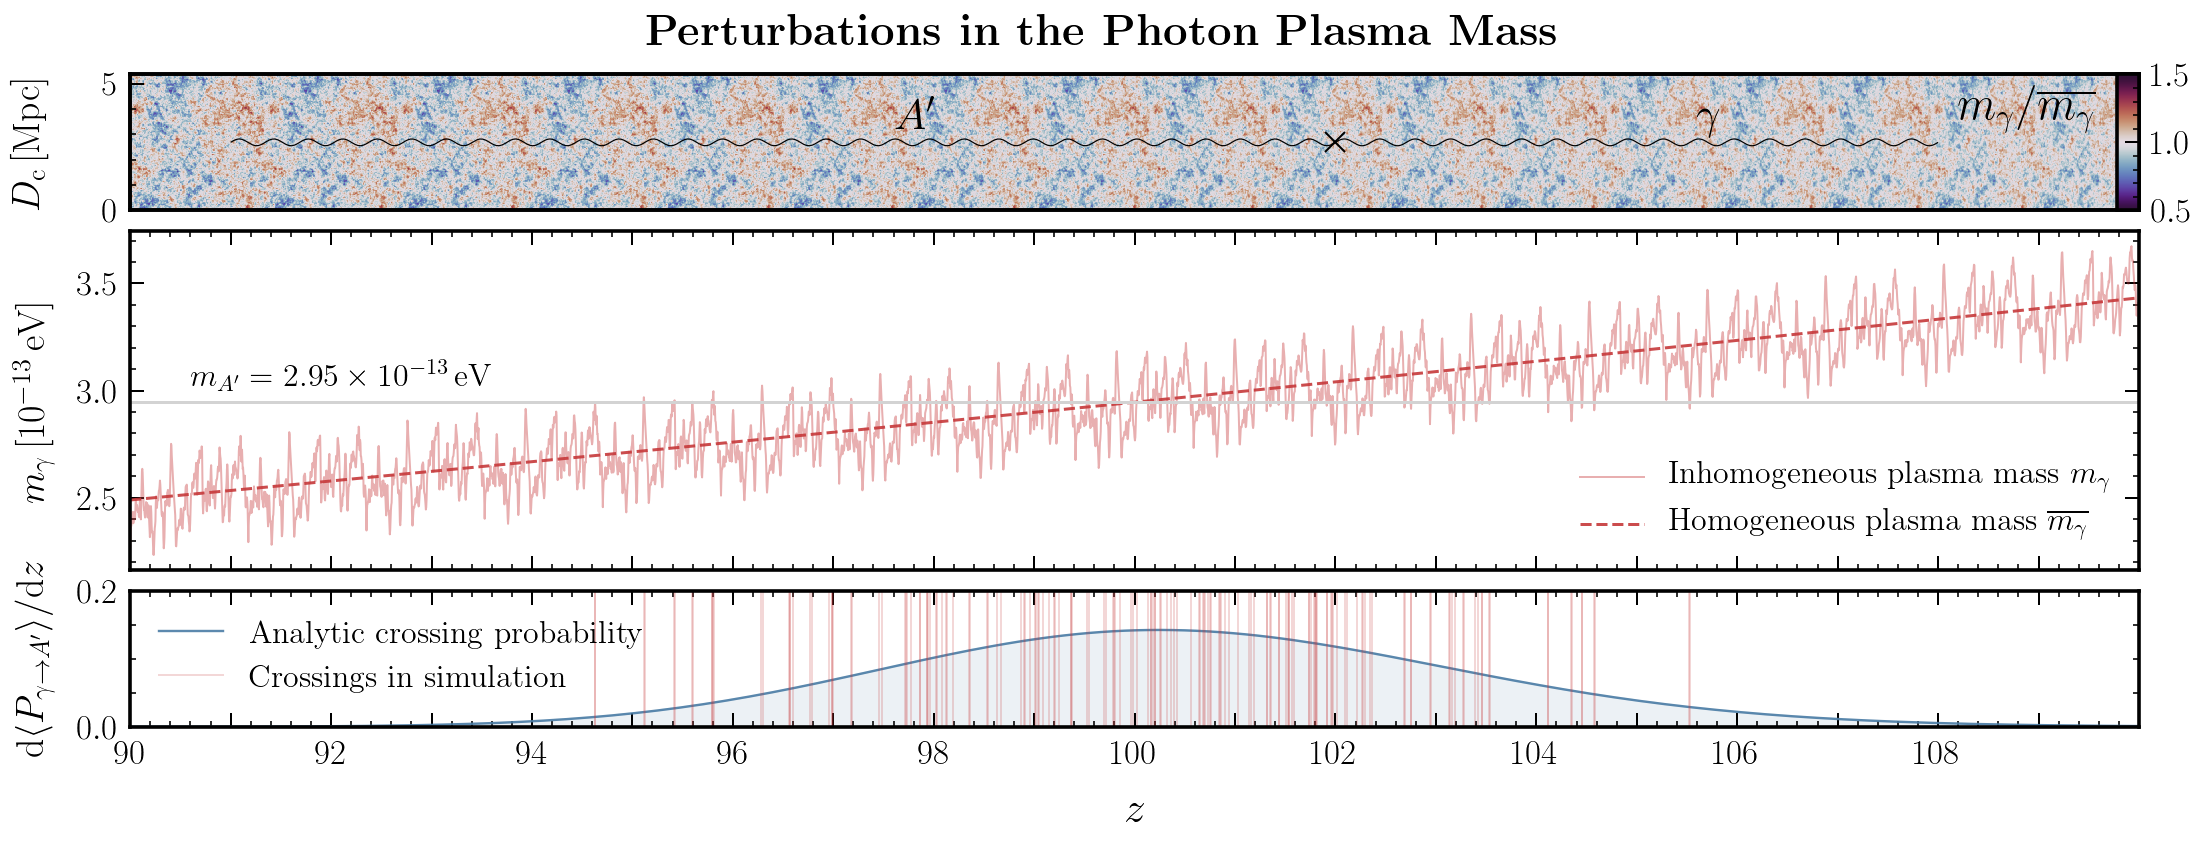

In [200]:
# Make plot!

fig = plt.figure(figsize=(18, 6)) 

## Define gridspec
gs = gridspec.GridSpec(3, 1, height_ratios=[1, 2.5, 1], hspace=0.1) 

## Top plot, 2D simulation projection

ax0 = plt.subplot(gs[0])

im = ax0.imshow((np.hstack(grid_new_list[:])),
           cmap='twilight_shifted',
           vmin=0 + 0.5,
           vmax=2 - 0.5,
           extent=[GRFB.z_bins[0], GRFB.z_bins[-1], 0, GRFB.d_comoving_bins[-1] - GRFB.d_comoving_bins[-2]],
           aspect='auto',
           origin='lower'
          )

ax0.text(108.2, 3.3, r"$m_{\gamma}/\overline{m_{\gamma}}$", fontsize=23)

## Feynman diagram

axn = ax0.twinx()
diagram = Diagram(axn)
v1 = diagram.verticle(xy=(91., 0.5), marker='')
v2 = diagram.verticle(xy=(108., 0.5), marker='')
v3 = diagram.verticle(xy=(102., 0.5), marker='x', lw=0.8)

nwiggles = 50
wz1 = diagram.line(v1, v3, flavour='wiggly', nwiggles=int(nwiggles * 11 / 17))
wz1.scale(.2)
wz2 = diagram.line(v2, v3, style='wiggly', nwiggles=int(nwiggles * 6 / 17))
wz2.scale(.2)
wz1.text("$A^\prime$",fontsize=22, t=0.6, y=+0.1)
wz2.text("$\gamma$",fontsize=22, t=0.4, y=-0.1)

diagram.plot()

divider = make_axes_locatable(ax0)
cax = divider.append_axes('right', size='4%', pad=10)
fig.colorbar(im, cax=cax, orientation='vertical')

## Middle plot, 1D simulation profile

ax1 = plt.subplot(gs[1])

ax1.plot(GRFB.z_ary_new, np.array(GRFB.m_A_perturb_ary) / (1e-13 * eV), alpha=0.4, c=cols_default[0], lw=1., label="Inhomogeneous plasma mass $m_{\gamma}$")
ax1.plot(GRFB.z_ary_new, np.sqrt(GRFB.m_A_sq_ary) / (1e-13 * eV), ls='--', lw=1.5, c=cols_default[0], label="Homogeneous plasma mass $\overline{m_{\gamma}}$")

ax1.plot()

ax1.axhline(GRFB.m_A_fid / (1e-13 * eV), lw=1.5, c='lightgrey')

ax1.text(90.6, 3, r"$m_{A^\prime} = 2.95\times 10^{-13}$\,eV", fontsize=16)

ax1.legend(fontsize=16, loc='lower right')

## Bottom plot, analytic dP/dz and crossings in simulations

ax2 = plt.subplot(gs[2])
ax2.plot(z_ary, dP_dz_ary  / np.trapz(dP_dz_ary[(z_ary > 80) * (z_ary < 110)], z_ary[(z_ary > 80) * (z_ary < 110)]), lw=1.2, c=cols_default[1], label='Analytic crossing probability')
ax2.fill_between(z_ary, np.zeros_like(z_ary), dP_dz_ary  / np.trapz(dP_dz_ary[(z_ary > 80) * (z_ary < 110)], z_ary[(z_ary > 80) * (z_ary < 110)]), alpha=0.1, color=cols_default[1])

for z_cross in GRFB.z_crossings_collect_temp:
    ax2.axvline(z_cross, lw=1, alpha=0.2, c=cols_default[0])
ax2.plot([],[], lw=1, alpha=0.2, c=cols_default[0], label='Crossings in simulation')
ax2.legend(fontsize=16, )

## Set plot properties

ax0.set_ylabel("$D_{\mathrm c}$\,[Mpc]", labelpad=25)
ax1.set_ylabel("$m_{\gamma}\,[10^{-13}\,\mathrm{eV]}$")
ax2.set_ylabel(r"$\mathrm d\langle P_{\gamma \rightarrow A'} \rangle / \mathrm dz$")
ax2.set_xlabel("$z$", fontsize=22)

plt.suptitle(r"\bf{Perturbations in the Photon Plasma Mass}", y=0.95, fontsize=22)

ax0.set_xlim(min(GRFB.z_ary_new), max(GRFB.z_ary_new))
ax1.set_xlim(min(GRFB.z_ary_new), max(GRFB.z_ary_new))
ax2.set_xlim(min(GRFB.z_ary_new), max(GRFB.z_ary_new))
ax2.set_ylim(0, .2)

plt.setp(ax0.get_xticklabels(), visible=False)
plt.setp(ax1.get_xticklabels(), visible=False)

loc_major = matplotlib.ticker.MultipleLocator(base=1.) # this locator puts ticks at regular intervals
loc_minor = matplotlib.ticker.MultipleLocator(base=0.2) # this locator puts ticks at regular intervals
ax1.xaxis.set_major_locator(loc_major)
ax2.xaxis.set_major_locator(loc_major)
ax2.xaxis.set_minor_locator(loc_minor)
ax2.xaxis.set_minor_locator(loc_minor)

ax2.set(xticks=np.arange(90, 110), xticklabels=[x if not x%2 else None for x in np.arange(90, 110)])

plt.subplots_adjust(wspace=10)

plt.tight_layout()

## Save

# plt.savefig(plots_dir + "perturbations.pdf", bbox_inches='tight')
# plt.savefig(plots_dir + "perturbations_web.png", bbox_inches='tight')

## Comparison of simulations and analytic treatment

In [127]:
n_mc = 100
z_fid = 20.
z_range = [18.,22.]
k_max = 10.
n_points = 100

z_crossings_collect = []
P_collect = []

for i_mc in tqdm_notebook(range(n_mc)):
    GRFB = GaussianRandomFieldBoxes(z_fid=z_fid, z_range=z_range, k_max=k_max, n_points=n_points, r_filter=2., use_nbodykit=1, generate_1d=0, log_pk_interp=pspec)
    z_crossings_collect_temp = []
    P_collect_temp = []
    z_crossings_collect.append(GRFB.z_crossings_collect_temp)
    P_collect.append(GRFB.P_collect_temp)
    if GRFB.P_homo is not None:
        P_homo = GRFB.P_homo
    
P_collect = np.array(P_collect)
z_crossings_collect = np.array(z_crossings_collect)

In [121]:
y = []
for i_mc in range(n_mc):
    _y, _x, _ = binned_statistic(z_crossings_collect[i_mc], P_collect[i_mc], 'sum', bins=17, range=z_range)
    y.append(_y)
x = _x
bin_centers = (x[1:] + x[:-1])/2.

In [122]:
norm = (bin_centers[1] - bin_centers[0]) * np.sum(np.mean(y, axis=0))

In [125]:
pspec = PowerSpectrumGridInterpolator("nonlin_matter", k_max=1e6)
firas = FIRAS(pspec)
z_ary, dP_dz_ary, _, _  = firas.P_tot_perturb([firas.omega_FIRAS[0]], 1., GRFB.m_A_fid , pdf="gaussian", k_max=10., r_smooth=1.25)
dP_dz_ary = dP_dz_ary[0]

../grf/grf.py:512: FutureWarning: read_table is deprecated, use read_csv instead.
  


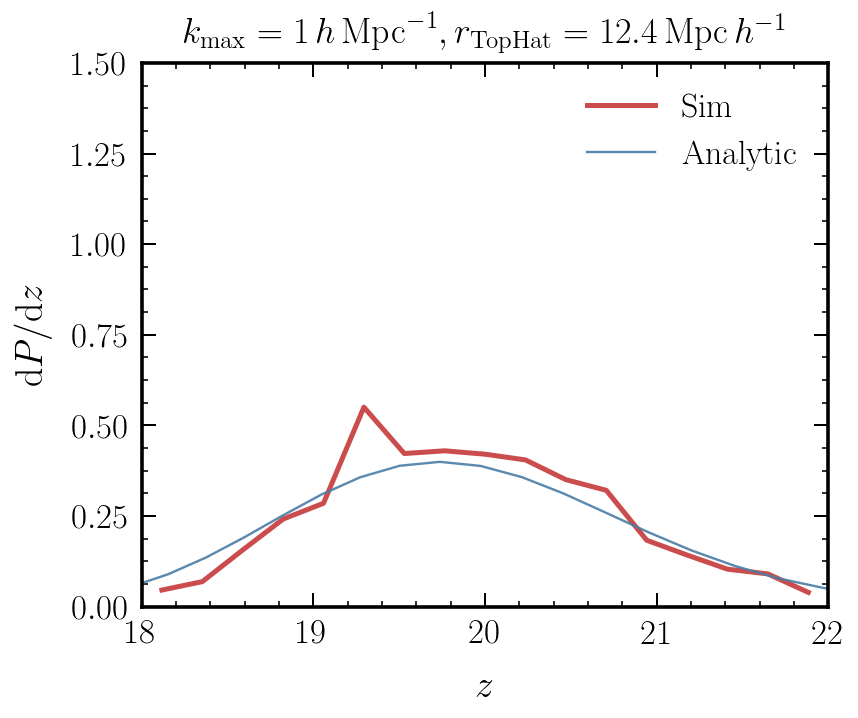

In [126]:
plt.plot(bin_centers, np.mean(y, axis=0) / norm, label="Sim")
plt.plot(z_ary, dP_dz_ary  / np.trapz(dP_dz_ary[(z_ary > 15) * (z_ary < 25)], z_ary[(z_ary > 15) * (z_ary < 25)]), lw=1.2, label="Analytic")

plt.xlim(18, 22)
plt.ylim(0, 1.5)
plt.ylabel("$\mathrm{d}P/\mathrm{d}z$")
plt.xlabel("$z$")
plt.title("$k_\mathrm{max}=1\,h\,\mathrm{Mpc}^{-1}, r_\mathrm{TopHat}=12.4\,\mathrm{Mpc}\,h^{-1}$")

plt.legend()